# Colab CNN

MNIST data 로 CNN 모형 구축 및 학습

In [0]:
import keras
from keras import models, layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

## Construct the models

1. model structure
  - conv1 lyaer: (3,3) filter 32 개
  - max pooling: (2,2)
  - conv2 layer: (3,3) filter 64 개
  - maxpooling: (2,2)
  -conv2 layer: (3,3) filter 64개
  - Flatten: **output?**
  - Dense: ?- > 64
  - Dense: 64-> 10 (softmax)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [0]:
#model.summary()

## Reshape Data!

- Normalize (0~1)
- (28,28,1)
- categorical output

In [0]:
(images,labels),(test_images, test_labels) = mnist.load_data()
images = images.reshape((-1,28,28,1))
images = images.astype('float32')/255
train_images = images[:50000]
val_images = images[50000:]

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

labels = to_categorical(labels)
train_labels = labels[:50000]
val_labels = labels[50000:]
test_labels = to_categorical(test_labels)

In [14]:
print(train_images.shape)

(60000, 28, 28, 1)


## Construct loss function

In [27]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size = 64, validation_data=(val_images, val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 51s 1ms/step - loss: 0.0174 - acc: 0.9949 - val_loss: 0.0137 - val_acc: 0.9964
Epoch 2/5
50000/50000 [==============================] - 51s 1ms/step - loss: 0.0139 - acc: 0.9958 - val_loss: 0.0162 - val_acc: 0.9960
Epoch 3/5
50000/50000 [==============================] - 50s 1ms/step - loss: 0.0110 - acc: 0.9967 - val_loss: 0.0183 - val_acc: 0.9958
Epoch 4/5
50000/50000 [==============================] - 50s 1ms/step - loss: 0.0102 - acc: 0.9968 - val_loss: 0.0206 - val_acc: 0.9950
Epoch 5/5
50000/50000 [==============================] - 50s 1ms/step - loss: 0.0085 - acc: 0.9973 - val_loss: 0.0264 - val_acc: 0.9942


In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 301us/step


In [29]:
test_acc

0.9915

In [30]:
model.history.history

{'acc': [0.9949, 0.99578, 0.99674, 0.99682, 0.99728],
 'loss': [0.017395479713581734,
  0.013933230639119866,
  0.011031157321698484,
  0.01016947453363584,
  0.008483123413282046],
 'val_acc': [0.9964, 0.996, 0.9958, 0.995, 0.9942],
 'val_loss': [0.01370383585980162,
  0.016182309215824718,
  0.018339768290975916,
  0.020625766076649687,
  0.026437211669510543]}

## plot results

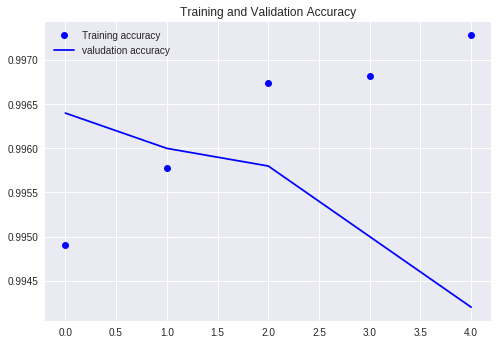

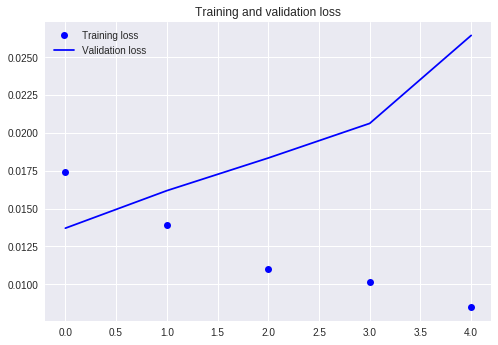

In [31]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label = "valudation accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Fashion-MNIST

In [0]:
from keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## CNN performance